In [1]:
import tweepy
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from credentials import *

In [3]:
def twitter_setup():
    auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)
    api = tweepy.API(auth)
    return api   


In [4]:
extractor = twitter_setup()
tweets = extractor.user_timeline(screen_name = "realDonaldTrump", count = 200)
print("Number of tweets extracted : {}.\n".format(len(tweets)))

print("5 recent tweets :\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted : 200.

5 recent tweets :

â€œGOP Lawmakers asking Sessions to Investigate Comey and Hillary Clinton.â€� @FoxNews   Good luck with that request!

â€œAt least two Memos Comey shared with a friend contained Classified Information.â€�  Wall Street Journal

RT @dmartosko: The same can be said of the "collusion" stuff. https://t.co/xMCVuH3OTs

The Washington Post said I refer to Jeff Sessions as â€œMr. Magooâ€� and Rod Rosenstein as â€œMr. Peepers.â€� This is â€œaccoâ€¦ https://t.co/ISMM0vuii6

James Comeyâ€™s Memos are Classified, I did not Declassify them. They belong to our Government! Therefore, he broke tâ€¦ https://t.co/Qw0POMocIy



In [5]:
data = pd.DataFrame(data =[tweet.text for tweet in tweets], columns = ['Tweets'])
display(data.head(10))

,Tweets
0,â€œGOP Lawmakers asking Sessions to Investigate ...
1,â€œAt least two Memos Comey shared with a friend...
2,"RT @dmartosko: The same can be said of the ""co..."
3,The Washington Post said I refer to Jeff Sessi...
4,"James Comeyâ€™s Memos are Classified, I did not ..."
5,Sylvester Stallone called me with the story of...
6,"So funny, the Democrats have sued the Republic..."
7,Heading to the Southern White House to watch t...
8,"Today, my thoughts and prayers are with the en..."
9,Fantastic crowd and great people yesterday in ...


In [8]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [9]:
data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

In [10]:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,â€œGOP Lawmakers asking Sessions to Investigate ...,113,988030312088260608,2018-04-22 12:22:37,Twitter for iPhone,6209,1668
1,â€œAt least two Memos Comey shared with a friend...,102,987820963038449664,2018-04-21 22:30:45,Twitter for iPhone,61461,16113
2,"RT @dmartosko: The same can be said of the ""co...",85,987820268402946049,2018-04-21 22:27:59,Twitter for iPhone,0,5020
3,The Washington Post said I refer to Jeff Sessi...,140,987786331995672576,2018-04-21 20:13:08,Twitter for iPhone,49247,13385
4,"James Comeyâ€™s Memos are Classified, I did not ...",140,987774054651301888,2018-04-21 19:24:21,Twitter for iPhone,54606,15612
5,Sylvester Stallone called me with the story of...,140,987768453338673152,2018-04-21 19:02:05,Twitter for iPhone,75043,16694
6,"So funny, the Democrats have sued the Republic...",140,987766033862873091,2018-04-21 18:52:28,Twitter for iPhone,73693,19060
7,Heading to the Southern White House to watch t...,140,987719560282476546,2018-04-21 15:47:48,Twitter for iPhone,66449,10790
8,"Today, my thoughts and prayers are with the en...",140,987718953886679047,2018-04-21 15:45:24,Twitter for iPhone,64703,11304
9,Fantastic crowd and great people yesterday in ...,99,987718832096768001,2018-04-21 15:44:55,Twitter for iPhone,55926,12115


In [13]:
mean = np.mean(data['len'])
print("The average length of every tweet is: {}".format(mean))

fav_max = np.max(data['Likes']) 
rt_max = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0] 
rt = data[data.RTs == rt_max].index[0]

print("The tweet with more likes is: \n{}".format(data['Tweets'][fav])) 
print("The number of likes: {}".format(fav_max)) 
print("{} characters.\n".format(data['len'][fav]))

print("The tweet with most retweets is: \n{}".format(data['Tweets'][rt])) 
print("Number of retweets: {}".format(rt_max)) 
print("{} characters. \n".format(data['len'][rt]))


The average length of every tweet is: 128.285
The tweet with more likes is: 
HAPPY EASTER!
The number of likes: 209232
13 characters.

The tweet with most retweets is: 
Russia vows to shoot down any and all missiles fired at Syria. Get ready Russia,  because they will be coming, niceâ€¦ https://t.co/tFXJAYDnOh
Number of retweets: 66662
140 characters. 



In [14]:
tlen = pd.Series(data = data['len'].values, index = data['Date'])
tfav = pd.Series(data = data['Likes'].values, index = data['Date'])
tret = pd.Series(data = data['RTs'].values, index = data['Date'])

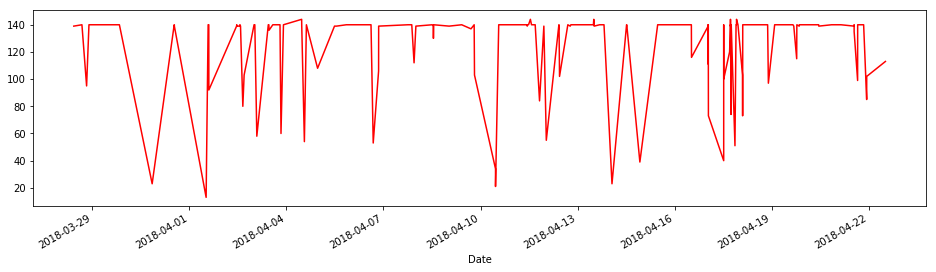

In [15]:
tlen.plot(figsize=(16,4),color='r')

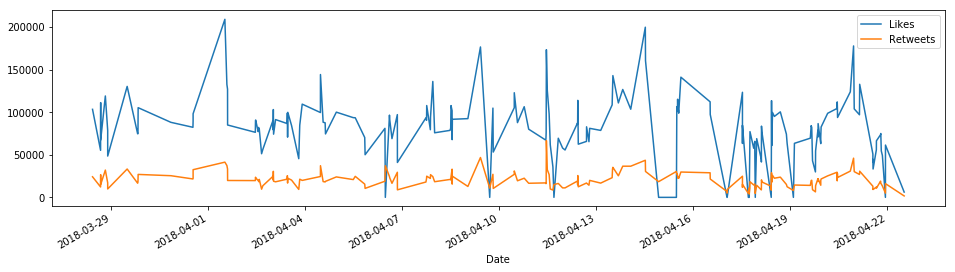

In [16]:
tfav.plot(figsize=(16,4), label='Likes', legend=True)
tret.plot(figsize=(16,4),label='Retweets',legend=True)

In [17]:
from textblob import TextBlob
import re

In [18]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [19]:
data['SA'] = np.array([analize_sentiment(tweet) for tweet in data['Tweets']])
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,â€œGOP Lawmakers asking Sessions to Investigate ...,113,988030312088260608,2018-04-22 12:22:37,Twitter for iPhone,6209,1668,1
1,â€œAt least two Memos Comey shared with a friend...,102,987820963038449664,2018-04-21 22:30:45,Twitter for iPhone,61461,16113,-1
2,"RT @dmartosko: The same can be said of the ""co...",85,987820268402946049,2018-04-21 22:27:59,Twitter for iPhone,0,5020,0
3,The Washington Post said I refer to Jeff Sessi...,140,987786331995672576,2018-04-21 20:13:08,Twitter for iPhone,49247,13385,0
4,"James Comeyâ€™s Memos are Classified, I did not ...",140,987774054651301888,2018-04-21 19:24:21,Twitter for iPhone,54606,15612,0
5,Sylvester Stallone called me with the story of...,140,987768453338673152,2018-04-21 19:02:05,Twitter for iPhone,75043,16694,0
6,"So funny, the Democrats have sued the Republic...",140,987766033862873091,2018-04-21 18:52:28,Twitter for iPhone,73693,19060,1
7,Heading to the Southern White House to watch t...,140,987719560282476546,2018-04-21 15:47:48,Twitter for iPhone,66449,10790,1
8,"Today, my thoughts and prayers are with the en...",140,987718953886679047,2018-04-21 15:45:24,Twitter for iPhone,64703,11304,1
9,Fantastic crowd and great people yesterday in ...,99,987718832096768001,2018-04-21 15:44:55,Twitter for iPhone,55926,12115,1


In [20]:
pos_tweets = [tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [22]:
print("Percentage of Positive Tweets : {}%".format(len(pos_tweets) / len(data['Tweets']) * 100))

Percentage of Positive Tweets : 49.0%


In [23]:
print("Percentage of Neutral Tweets : {}%".format(len(neu_tweets) / len(data['Tweets']) * 100))
print("Percentage of Negative Tweets : {}%".format(len(neg_tweets) / len(data['Tweets']) * 100))

Percentage of Neutral Tweets : 23.0%
Percentage of Negative Tweets : 28.000000000000004%


In [24]:
import os
import pymongo
import json

In [25]:
mng_client = pymongo.MongoClient('localhost',27017)
mng_db = mng_client['TwitterData']
collection_name = 'sentimentAnalysisData'
db_cm = mng_db[collection_name]

In [27]:
data_json = json.loads(data.to_json(orient='records'))
db_cm.remove
db_cm.insert_many(data_json)